In [36]:
import numpy as np
csv_path = "mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set the prohibition of exponential notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
# the number of that point | latitude | longitude | elevation | distance from point 0

In [37]:
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


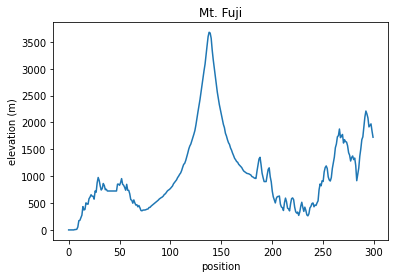

In [38]:
"""
Problem 1
Visualization of data
"""

import matplotlib.pyplot as plt

%matplotlib inline
plt.title("Mt. Fuji")
plt.xlabel("position")
plt.ylabel("elevation (m)")
plt.plot(fuji[:,0], fuji[:,3])
plt.show()

In [39]:
"""
Problem 2
Create a function to calculate the slope of a point
"""

point_number = fuji[:,0]
elevation = fuji[:,3]

def calculate_gradient(pos):
  delta_x = point_number[1:] - point_number[:-1]
  delta_y = elevation[1:] - elevation[:-1]

  gradient = delta_y/delta_x

  return gradient[pos]

In [40]:
"""
Problem 3
Create a function to calculate the destination
"""

LEARNING_RATE = 0.2

def calculate_destination(current_loc, alpha=LEARNING_RATE):
  destination = current_loc - alpha*calculate_gradient(current_loc)
  
  if destination < 0:
      raise Exception('Destination cannot be negative')

  return int(np.rint(destination))

In [41]:
"""
Problem 4
Creating a function to go down the mountain
"""

def go_down_hill(initial, alpha=LEARNING_RATE):
  dest_lst = []

  destination = calculate_destination(initial, alpha)
  for i in range(1000):
    temp = calculate_destination(destination, alpha)
    if temp == destination:
      break
    dest_lst.append(temp)
    destination = temp

  return dest_lst

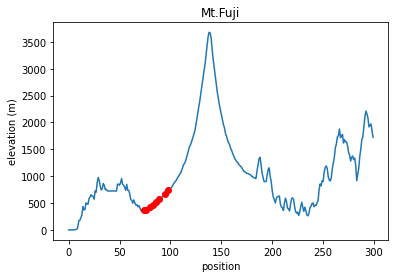

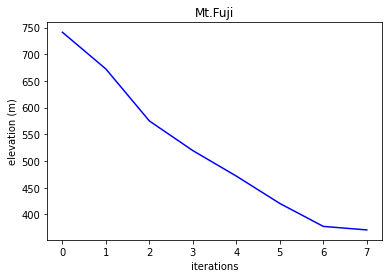

In [42]:
"""
Problem 5
Visualization of the descent process
"""

def drawGraph(des_points):
  plt.title("Mt.Fuji")
  plt.xlabel("position")
  plt.ylabel("elevation (m)")
  plt.plot(point_number, elevation)
  plt.plot(des_points, elevation[des_points], 'ro')
  plt.show()

  plt.title("Mt.Fuji")
  plt.xlabel("iterations")
  plt.ylabel("elevation (m)")
  plt.plot(list(range(len(des_points))), elevation[des_points], 'b-')
  plt.show()

des_points = go_down_hill(136)
drawGraph(des_points)

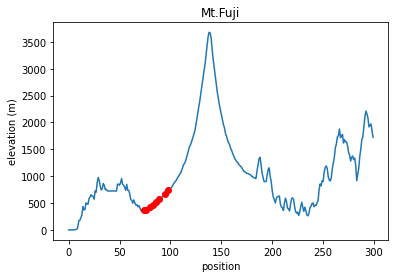

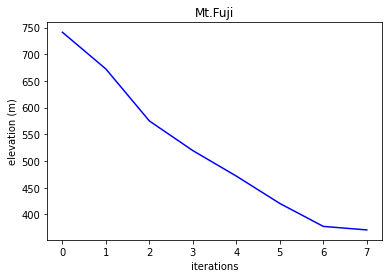

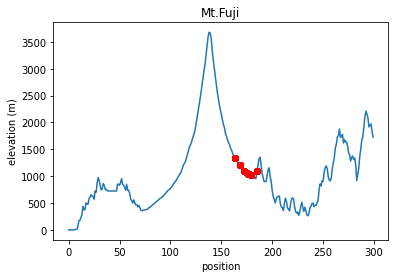

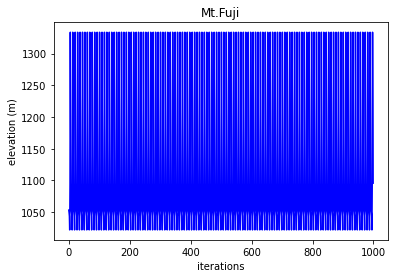

In [43]:
"""
Problem 6
Change of initial value
"""

des_points = go_down_hill(136)
drawGraph(des_points)

des_points = go_down_hill(142)
drawGraph(des_points)

# Failed to converge when start at position 142th

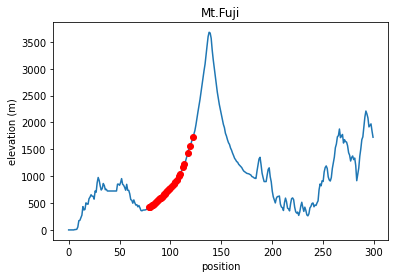

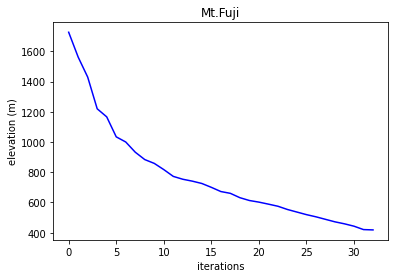

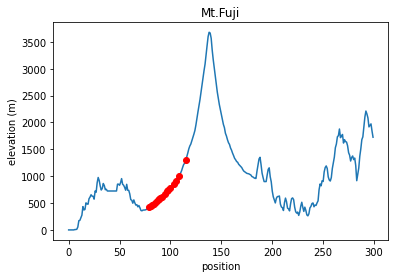

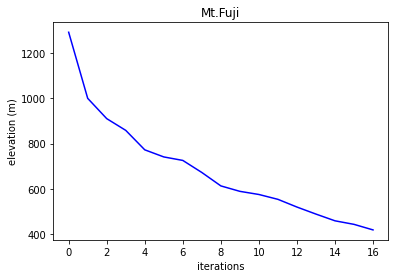

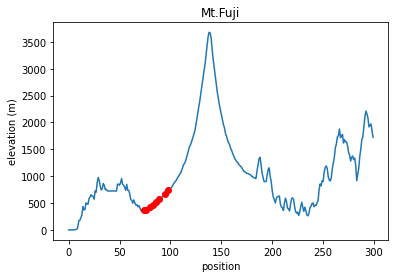

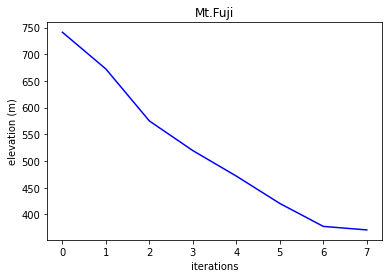

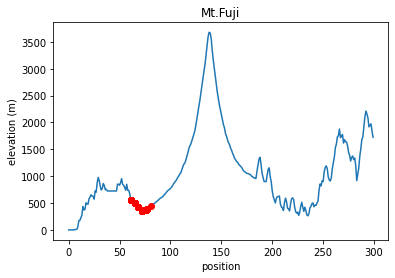

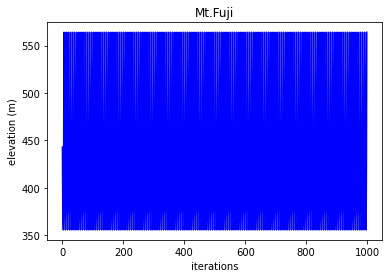

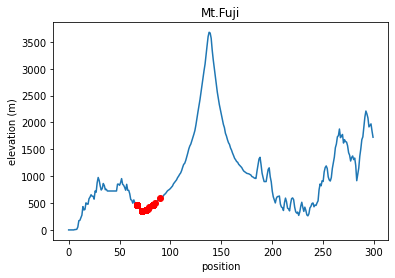

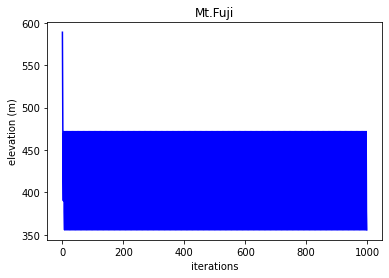

In [44]:
"""
Problem 7
Change hyperparameters
"""

des_points = go_down_hill(136, 0.05)
drawGraph(des_points)

des_points = go_down_hill(136, 0.1)
drawGraph(des_points)

des_points = go_down_hill(136, 0.2)
drawGraph(des_points)

des_points = go_down_hill(136, 0.3)
drawGraph(des_points)

des_points = go_down_hill(136, 0.4)
drawGraph(des_points)

# Failed to converge with alpha = 0.3 and 0.4